In [1]:
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.layers import Embedding,LSTM,Dense,Dropout
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve
import numpy as np
from keras.utils import plot_model
import seaborn as sns

In [27]:
train=pd.read_csv('Train.csv')
train.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [28]:
test=pd.read_csv('Test.csv')
test.head()

,ID,text
0,test_2,Why is explained in the video take a look
1,test_3,Ed Davey fasting for Ramadan No contest
2,test_4,Is Doja Cat good or do you just miss Nicki Minaj
3,test_8,How Boris Johnson s cheery wounded in action p...
4,test_9,Man it s terrible Not even a reason to get on ...


In [29]:
X=train['text']
y=train['target']
X_test=test['text']

In [70]:
X.head()

0              The bitcoin halving is cancelled due to
1    MercyOfAllah In good times wrapped in its gran...
2    266 Days No Digital India No Murder of e learn...
3    India is likely to run out of the remaining RN...
4    In these tough times the best way to grow is t...
Name: text, dtype: object

In [71]:
y

0       1
1       0
2       1
3       1
4       0
       ..
5282    1
5283    1
5284    0
5285    0
5286    0
Name: target, Length: 5287, dtype: int64

In [30]:
def tokenize(sentence):
    return word_tokenize(sentence)
def clean(sentence):
    words=[]
    for word in tokenize(sentence):
        if  word not in STOPWORDS and word not in punct and not word.isdigit():
            words.append(word.lower())
    return ' '.join(words)  

In [31]:
for i in range(len(X)):
    X[i]=clean(X[i])
for i in range(len(X_test)):
    X_test[i]=clean(X_test[i])
X.head()

C:\Users\Ahmed Ashraf\AppData\Local\Temp\ipykernel_8240\2903338007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=clean(X[i])


0                    the bitcoin halving cancelled due
1    mercyofallah in good times wrapped granular de...
2    days no digital india no murder e learning no ...
3    india likely run remaining rna kits essential ...
4    in tough times best way grow learn case teach ...
Name: text, dtype: object

In [72]:
max_length=200
max_word=5000
tokenizer=Tokenizer(num_words=max_word)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
word_index_list = list(word_index.items())
df = pd.DataFrame(word_index_list, columns=['word', 'index'])
df

,word,index
0,the,1
1,to,2
2,of,3
3,and,4
4,a,5
...,...,...
14323,1009117904,14324
14324,swap,14325
14325,derivative,14326
14326,pricing,14327


In [73]:
X=tokenizer.texts_to_sequences(X)
X=sequence.pad_sequences(X,maxlen=max_length)
X.shape

(5287, 200)

In [74]:
X_test=tokenizer.texts_to_sequences(X_test)
X_test=sequence.pad_sequences(X_test,maxlen=max_length)
X_test.shape

(1962, 200)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=40,shuffle=True)
print("x_train shape is :",x_train.shape)
print("x_test shape is :",x_test.shape)
print("y_train shape is :",y_train.shape)
print("y_test shape is :",y_test.shape)

x_train shape is : (4493, 13952)
x_test shape is : (794, 13952)
y_train shape is : (4493,)
y_test shape is : (794,)


In [76]:
model=Sequential()
model.add(Embedding(max_word,64,input_length=max_length))
model.add(Dropout(.5))
model.add(LSTM(25,recurrent_dropout=.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 200, 64)           320000    
                                                                 
 dropout_3 (Dropout)         (None, 200, 64)           0         
                                                                 
 lstm_5 (LSTM)               (None, 25)                9000      
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 329,026
Trainable params: 329,026
Non-trainable params: 0
_________________________________________________________________


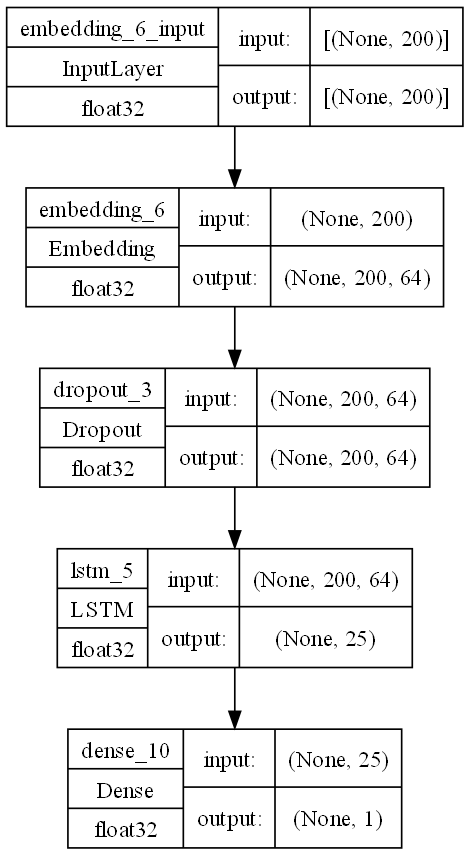

In [96]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [77]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
early_stop=EarlyStopping(monitor='val_loss',patience=10)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=50,
                    validation_split=.1,
                    callbacks=[reduce_lr,early_stop])

Epoch 1/50
127/127 [==============================] - 18s 121ms/step - loss: 0.5859 - accuracy: 0.7020 - val_loss: 0.4130 - val_accuracy: 0.8222 - lr: 0.0010
Epoch 2/50
127/127 [==============================] - 15s 119ms/step - loss: 0.2508 - accuracy: 0.9090 - val_loss: 0.2577 - val_accuracy: 0.9089 - lr: 0.0010
Epoch 3/50
127/127 [==============================] - 15s 119ms/step - loss: 0.1414 - accuracy: 0.9505 - val_loss: 0.2648 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 4/50
127/127 [==============================] - 15s 120ms/step - loss: 0.0882 - accuracy: 0.9735 - val_loss: 0.2639 - val_accuracy: 0.9067 - lr: 0.0010
Epoch 5/50
127/127 [==============================] - 15s 118ms/step - loss: 0.0563 - accuracy: 0.9837 - val_loss: 0.2820 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 6/50
127/127 [==============================] - 15s 121ms/step - loss: 0.0368 - accuracy: 0.9908 - val_loss: 0.3012 - val_accuracy: 0.8978 - lr: 1.0000e-04
Epoch 7/50
127/127 [============================

In [78]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.585904,0.701954,0.412998,0.822222,0.001000
1,0.250791,0.908978,0.257703,0.908889,0.001000
2,0.141370,0.950532,0.264812,0.888889,0.001000
3,0.088245,0.973535,0.263919,0.906667,0.001000
4,0.056342,0.983675,0.281994,0.893333,0.001000
5,0.036769,0.990848,0.301204,0.897778,0.000100
6,0.028729,0.993816,0.308282,0.895556,0.000100
7,0.029441,0.991343,0.312079,0.895556,0.000100
8,0.028784,0.993322,0.312129,0.897778,0.000010
9,0.025806,0.994806,0.313361,0.897778,0.000010


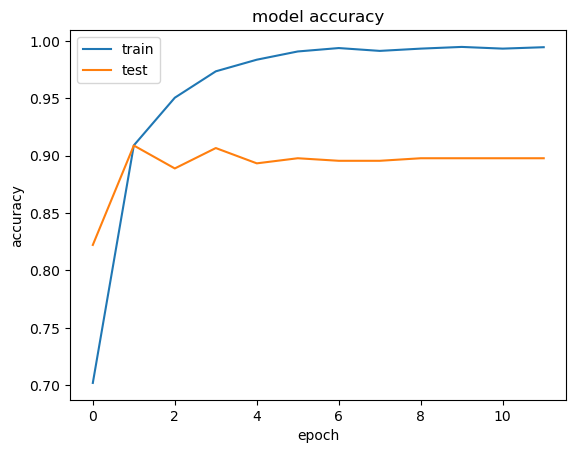

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

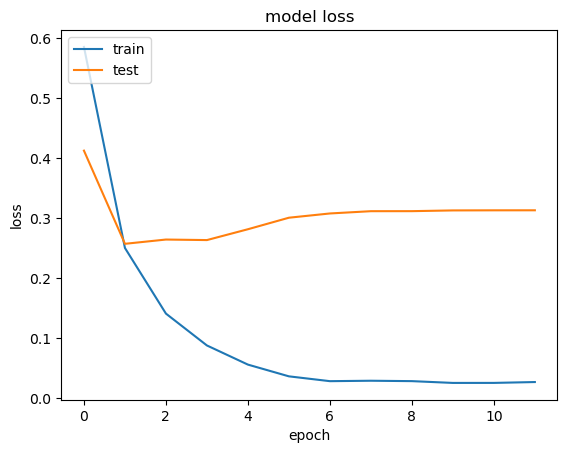

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [81]:
model.evaluate(x_test,y_test)

25/25 [==============================] - 0s 18ms/step - loss: 0.3627 - accuracy: 0.8929


[0.362682968378067, 0.8929470777511597]

In [88]:
y_pred=model.predict(x_test)
y_pred=np.where(y_pred > 0.5, 1, 0)
y_pred

25/25 [==============================] - 1s 19ms/step


array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

array([[363,  54],
       [ 31, 346]], dtype=int64)

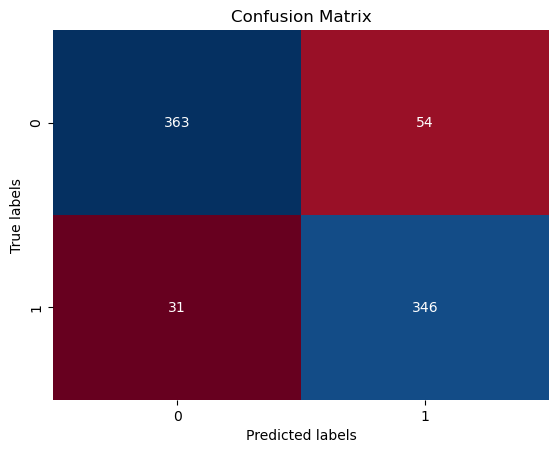

In [90]:
ax= plt.subplot()
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
CM

In [91]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.92      0.87      0.90       417
           1       0.86      0.92      0.89       377

    accuracy                           0.89       794
   macro avg       0.89      0.89      0.89       794
weighted avg       0.89      0.89      0.89       794



In [93]:
fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.8941377402057133


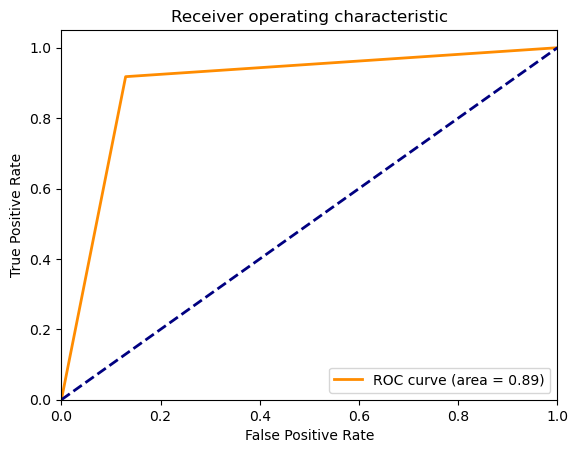

In [94]:
plt.plot(fprValue2,tprValue2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % AUCValue)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [87]:
Y_test_pred=model.predict(X_test)
Y_test=np.where(Y_test_pred > 0.5, 1, 0)
df=pd.DataFrame(index=test['ID'])
df['target']=Y_test
df.to_csv('prediction.csv')
df

62/62 [==============================] - 1s 19ms/step


,target
ID,
test_2,1
test_3,0
test_4,0
test_8,1
test_9,0
...,...
test_2932,1
test_2934,1
test_2936,0
